In [31]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
# import cv2
import pandas as pd
from PIL import Image, ImageFilter

import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras import backend as K
from keras.callbacks import TensorBoard

import tensorflow as tf

In [32]:
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend" #for GPU Support on MacBook
print(tf.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

1.13.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12111724550885453535
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4945621811
locality {
  bus_id: 1
  links {
  }
}
incarnation: 249694089766559540
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [33]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
currentDir = os.getcwd()
datasetDir = currentDir + "\\FilteredImages\\"
# datasetDir = currentDir + "/FilteredImages2/" # NEW SINGLE IMAGES DIRECTORY
trainDir = os.path.join(datasetDir, "train")
testDir = os.path.join(datasetDir, "test")
validDir = os.path.join(datasetDir, "valid")
y_dataDir = os.path.join(datasetDir, "y_data")

In [35]:
def sortFirst(val):
    return val[0]

def getBinary(dataFile):
    listOfTraining = []
    trainingHeader = []
    with open(dataFile) as csvfile:
#     reader = csv.DictReader(csvfile)
        reader2 = csv.reader(csvfile)
        listOfTraining = list(reader2)
        trainingHeader = listOfTraining[0]
        listOfTraining.pop(0)
#         listOfTraining = listOfTraining.sort(key = sortFirst, reverse = False)
#         np.asarray(listofTraining, dtype=np.int32)
#         return np.asarray(listofTraining, dtype=np.int32)
    listOfTrainingBinary = []
    for item in listOfTraining:
        listOfTrainingBinary.append(item[1])
    return np.asarray(listOfTrainingBinary, dtype=np.int32)

In [36]:
y_train = []
y_trainDir = os.path.join(y_dataDir, 'train_split_Depression_AVEC2017-edited.csv')
# print(y_trainDir)
y_train = getBinary(y_trainDir)
y_testDir = os.path.join(y_dataDir, 'dev_split_Depression_AVEC2017.csv')
# print(y_testDir)
y_test = getBinary(y_testDir)
print(y_train)
print(y_test)

# Y_train = np.asarray(y_train, dtype=np.int32)

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]


In [37]:
x_trainDir = trainDir
x_testDir = testDir

In [38]:
x_trainDir

'C:\\Users\\tanho\\Downloads\\Aaron-Workspace\\FilteredImages\\train'

In [39]:
# testSet = []
# testFolders =[]
# # trainingSet = []
# trainingFolders = []
# x_train = []
# y_train = []

def getImagesDir(mainDirectory):
    ImgDict = {}
    ImgList = []
    
    for folder in os.listdir(mainDirectory):
        theDir = os.path.join(mainDirectory, folder)
        images = os.listdir(theDir)
        listOfImgDir = []
        for img in images:
#             listOfImgDir.append(Image.open(os.path.join(theDir, img)))
            listOfImgDir.append(os.path.join(theDir, img))
#         print(listOfImgDir)
#         print(images)
        folderName = folder.split('_')
        ImgDict[folderName[0]] = listOfImgDir
        ImgList.append(listOfImgDir)
    imgList = ImgList.sort(key = sortFirst, reverse = False)
    return ImgList
        
        
#         for img in images
    
# for folder in toProcessList:
#     images = os.listdir(datasetDir + "/" + folder)
#     folderName = folder.split('_')
# #     print(folderName[0])
#     if folderName[0] in listOfTrainingName:
#         trainingFolders.append(datasetDir + "/" + folder)
# #         print(folderName)
#         index = listOfTrainingName.index(folderName[0])
#         temp = listOfTraining[index]
#         x_train.append(images)
#         tempBList = []
#         val = temp[1]
#         tempBList.append(val)
#         y_train.append(tempBList)
#         #temp.append(images)
#         #trainingSet.append(temp)
#     else:
#         testFolders.append(datasetDir + "/" + folder)
#         testSet.append(images)

trainingImagesDir = getImagesDir(trainDir)
testImagesDir = getImagesDir(testDir)
# np.array(trainingImages).shape

In [40]:
def importImages(listOfImgDir):
    myFolder = []
    for folder in listOfImgDir:
        myImages = []
        for image in folder:
            myImages.append(np.array(Image.open(image)))
        myFolder.append(np.array(myImages))
    return myFolder


#First Array iterate through Folder, Second Array Iterate though Image in Folder
trainingImages = importImages(trainingImagesDir)
testImages = importImages(testImagesDir)

In [41]:
#Num of Img, Height, Width
print(len(trainingImages)) 

len(y_train)

107


107

In [42]:
trainingImagesNP = np.array(trainingImages)
testImagesNP = np.array(testImages)

In [43]:
# print(trainingImages.shape)
# print(trainingImages[0])
# print(trainingImagesNP[10].shape)
# print(y_train)

neg = []
y_neg = []
pos = []
y_pos = []

for x,y in zip(trainingImages, y_train):
    if (y == 0):
        for each in x:
            neg.append(each)
            y_neg.append(0)
    else:
        for each in x:
            pos.append(each)
            y_pos.append(1)

X = pos + neg
Y = y_pos + y_neg

In [44]:
neg_test = []
y_neg_test = []
pos_test = []
y_pos_test = []

for x,y in zip(testImages, y_train):
    if (y == 0):
        for each in x:
            neg_test.append(each)
            y_neg_test.append(0)
    else:
        for each in x:
            pos_test.append(each)
            y_pos_test.append(1)

X_test = pos_test + neg_test
Y_test = y_pos_test + y_neg_test


npX_test = np.array(X_test)
npY_test = np.array(Y_test)
newNPX_test = npX_test.reshape(npX_test.shape[0], 101, 1000, 1)

In [45]:
vImagesDir = getImagesDir(validDir)
vImages = importImages(vImagesDir)
vImagesNP = np.array(vImages)

#TESTING DATA UNSEEN DATA
v = []
# y_neg_v = []
# pos_v = []
# y_pos_v = []

for x in vImages:
    for each in x:
        v.append(each)

# X_v = pos_v + neg_v
# Y_v = y_pos_v + y_neg_v


np_v = np.array(v)
# npY_test = np.array(Y_test)
newNPX_v = np_v.reshape(np_v.shape[0], 101, 1000, 1)

In [46]:
npX = np.array(X)
npY = np.array(Y)

In [47]:
print(npX.shape)
print(npY.shape)

(4591, 101, 1000)
(4591,)


In [48]:
newNPX = npX.reshape(npX.shape[0], 101, 1000, 1)

In [49]:
print(newNPX.shape)

(4591, 101, 1000, 1)


In [50]:
# print(trainingImagesNP)

In [51]:
# input_shape = (101, 1000, 3)

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# model.summary()

In [52]:
# from keras.preprocessing.image import ImageDataGenerator

In [53]:
#Saving Model
from keras.callbacks import ModelCheckpoint
#numEpochs = 100
numEpochs = 30
model_path = os.path.join(currentDir,'DAM-DHM-V-'+ str(numEpochs) +'.h5')

# checkpoint = ModelCheckpoint(model_path, monitor='loss', verbose=1, save_best_only=True, mode='max')

# checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=True, mode='max')

checkpoint = ModelCheckpoint(model_path, monitor='acc', verbose=1, save_best_only=False, save_weights_only=False, mode='auto')
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

callbacks_list = [checkpoint, tbCallBack]

In [54]:
# input_shape

In [55]:
input_shape = (101, 1000, 1)

In [56]:
# DR HARRY
from keras.callbacks import EarlyStopping

def evaluate_model(X_train, X_val, y_train, y_val):
    model = Sequential()
    model.add(Conv2D(32, (2, 3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(32, (2, 3), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(4, 3)))

8
    model.add(Conv2D(96, (2, 3), padding='same', activation='relu'))
    model.add(Conv2D(96, (2, 3), padding='same', activation='relu'))
    model.add(AveragePooling2D(pool_size=(4, 3)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adadelta', #adam
                  metrics=['accuracy']) 
    
    print(model.metrics_names)
    
    model.save_weights('model.h5')
    
    callbacks = [EarlyStopping(monitor='val_acc', patience = 10)]
    
    hist=model.fit(x=X_train, y=y_train, batch_size=32, epochs=numEpochs, callbacks=callbacks_list, validation_data=(X_val, y_val))
    
    _, val_acc=model.evaluate(x=X_val, y=y_val, verbose=1)
  
    model.load_weights('model.h5')
    
    model.summary()
    
    print("acc: ", np.mean(hist.history['acc']))
    
    print("val_acc: ", val_acc)
    
    model.save(''+ str(numEpochs) +' Epoch (Dr Harry Model) w validation.h5')
    
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()
    
    return model, val_acc

['loss', 'acc']
Train on 4591 samples, validate on 1740 samples
Epoch 1/30
4591/4591 [==============================] - 114s 25ms/step - loss: 0.6490 - acc: 0.7144 - val_loss: 0.6791 - val_acc: 0.5902

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4591/4591 [==============================] - 245s 53ms/step - loss: 0.6075 - acc: 0.7188 - val_loss: 0.6913 - val_acc: 0.5902

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4591/4591 [==============================] - 258s 56ms/step - loss: 0.5969 - acc: 0.7188 - val_loss: 0.7009 - val_acc: 0.5902

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4591/4591 [==============================] - 258s 56ms/step - loss: 0.5967 - acc: 0.7188 - val_loss: 0.7054 - val_acc: 0.5902

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4591/4591 [==================

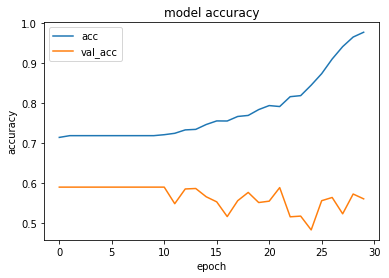

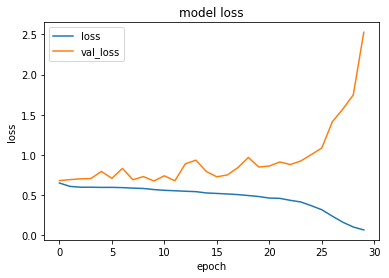

In [57]:
# run CNN model
model, val_acc = evaluate_model(newNPX, newNPX_test, npY, npY_test) 

['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 145s 35ms/step - loss: 0.6520 - acc: 0.7037 - val_loss: 0.6056 - val_acc: 0.7370

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 41s 10ms/step - loss: 0.6023 - acc: 0.7168 - val_loss: 0.5917 - val_acc: 0.7370

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 41s 10ms/step - loss: 0.6011 - acc: 0.7168 - val_loss: 0.5775 - val_acc: 0.7370

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 41s 10ms/step - loss: 0.5977 - acc: 0.7168 - val_loss: 0.5743 - val_acc: 0.7370

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [======================

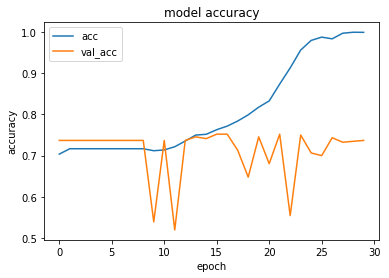

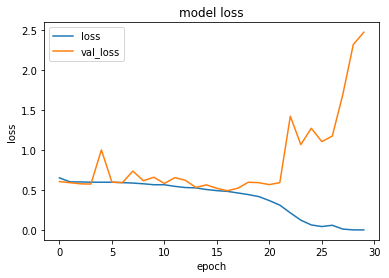

K-Fold has ran  1  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 33s 8ms/step - loss: 0.6315 - acc: 0.7102 - val_loss: 0.6006 - val_acc: 0.7304

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 32s 8ms/step - loss: 0.6017 - acc: 0.7175 - val_loss: 0.5895 - val_acc: 0.7304

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 32s 8ms/step - loss: 0.5974 - acc: 0.7175 - val_loss: 0.5856 - val_acc: 0.7304

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 32s 8ms/step - loss: 0.5994 - acc: 0.7175 - val_loss: 0.5831 - val_acc: 0.7304

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

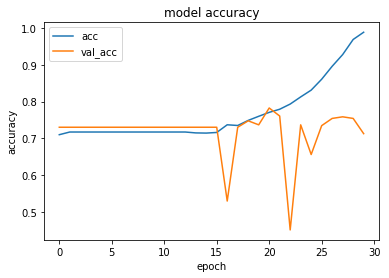

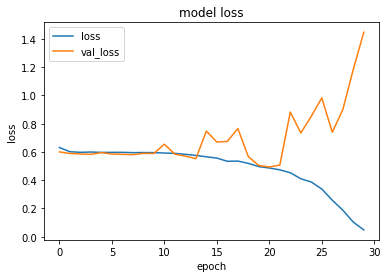

K-Fold has ran  2  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 43s 10ms/step - loss: 1.0014 - acc: 0.7151 - val_loss: 0.5866 - val_acc: 0.7261

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.5992 - acc: 0.7180 - val_loss: 0.5908 - val_acc: 0.7261

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.5974 - acc: 0.7180 - val_loss: 0.5902 - val_acc: 0.7261

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.6023 - acc: 0.7180 - val_loss: 0.5867 - val_acc: 0.7261

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/41

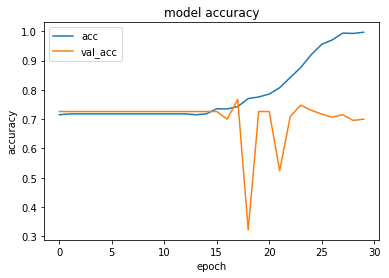

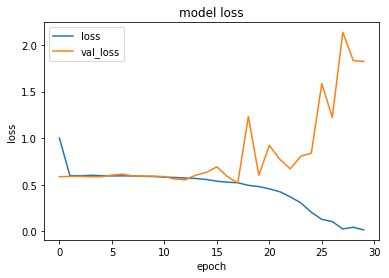

K-Fold has ran  3  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 45s 11ms/step - loss: 0.6313 - acc: 0.7131 - val_loss: 0.6500 - val_acc: 0.6870

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 44s 11ms/step - loss: 0.6034 - acc: 0.7223 - val_loss: 0.6216 - val_acc: 0.6870

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 44s 11ms/step - loss: 0.5957 - acc: 0.7223 - val_loss: 0.6209 - val_acc: 0.6870

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 45s 11ms/step - loss: 0.5933 - acc: 0.7223 - val_loss: 0.6216 - val_acc: 0.6870

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/41

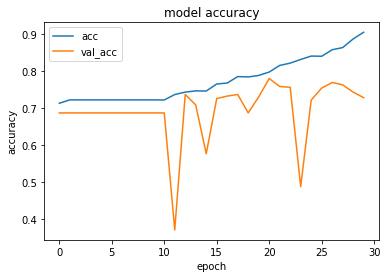

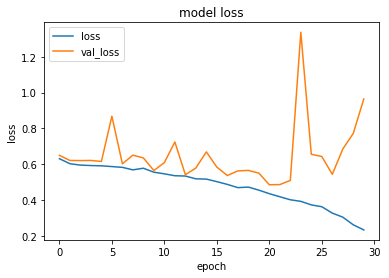

K-Fold has ran  4  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 43s 11ms/step - loss: 0.6379 - acc: 0.7141 - val_loss: 0.6410 - val_acc: 0.7239

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.6053 - acc: 0.7182 - val_loss: 0.5941 - val_acc: 0.7239

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.6005 - acc: 0.7182 - val_loss: 0.5930 - val_acc: 0.7239

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.5970 - acc: 0.7182 - val_loss: 0.5883 - val_acc: 0.7239

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/41

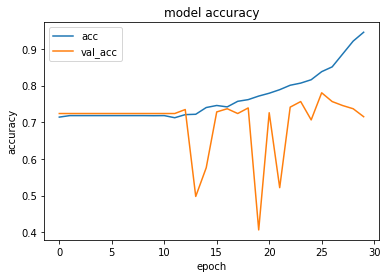

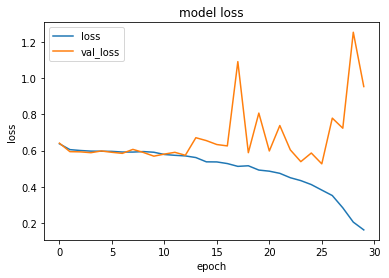

K-Fold has ran  5  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 43s 10ms/step - loss: 0.6561 - acc: 0.7168 - val_loss: 1.5066 - val_acc: 0.6978

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.6071 - acc: 0.7211 - val_loss: 0.6138 - val_acc: 0.6978

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 41s 10ms/step - loss: 0.6064 - acc: 0.7211 - val_loss: 1.2666 - val_acc: 0.6978

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.6004 - acc: 0.7211 - val_loss: 0.6132 - val_acc: 0.6978

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/41

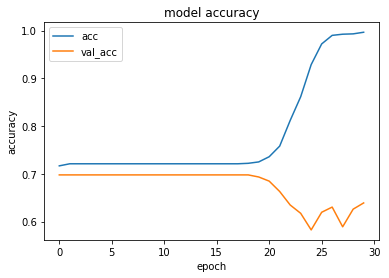

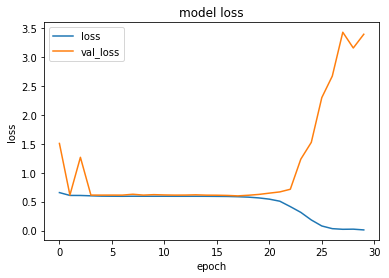

K-Fold has ran  6  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 43s 10ms/step - loss: 0.6497 - acc: 0.7158 - val_loss: 0.6421 - val_acc: 0.6935

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.6039 - acc: 0.7216 - val_loss: 0.6173 - val_acc: 0.6935

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.5986 - acc: 0.7216 - val_loss: 0.6161 - val_acc: 0.6935

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.5939 - acc: 0.7216 - val_loss: 0.6165 - val_acc: 0.6935

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/41

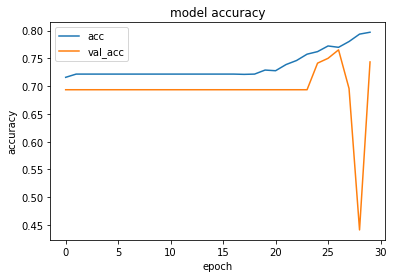

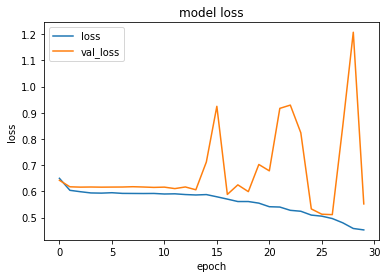

K-Fold has ran  7  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 36s 9ms/step - loss: 0.6453 - acc: 0.7139 - val_loss: 0.7461 - val_acc: 0.7239

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 36s 9ms/step - loss: 0.6091 - acc: 0.7182 - val_loss: 0.6012 - val_acc: 0.7239

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 36s 9ms/step - loss: 0.5993 - acc: 0.7182 - val_loss: 0.5989 - val_acc: 0.7239

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 36s 9ms/step - loss: 0.6021 - acc: 0.7182 - val_loss: 0.5895 - val_acc: 0.7239

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/4131 [

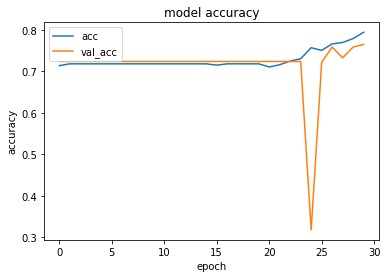

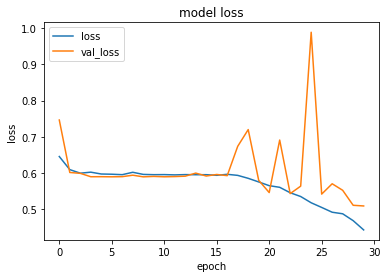

K-Fold has ran  8  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 43s 10ms/step - loss: 1.0472 - acc: 0.7090 - val_loss: 0.6513 - val_acc: 0.7239

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.6189 - acc: 0.7182 - val_loss: 0.6178 - val_acc: 0.7239

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.6001 - acc: 0.7182 - val_loss: 0.5917 - val_acc: 0.7239

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 42s 10ms/step - loss: 0.6061 - acc: 0.7182 - val_loss: 0.5927 - val_acc: 0.7239

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
4131/41

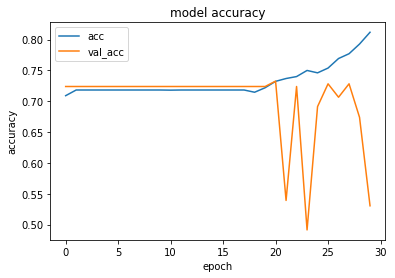

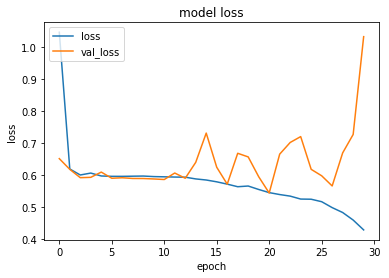

K-Fold has ran  9  time(s)
['loss', 'acc']
Train on 4131 samples, validate on 460 samples
Epoch 1/30
4131/4131 [==============================] - 219s 53ms/step - loss: 0.6314 - acc: 0.7158 - val_loss: 0.6162 - val_acc: 0.6957

Epoch 00001: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 2/30
4131/4131 [==============================] - 217s 52ms/step - loss: 0.6043 - acc: 0.7214 - val_loss: 0.6620 - val_acc: 0.6957

Epoch 00002: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 3/30
4131/4131 [==============================] - 216s 52ms/step - loss: 0.5960 - acc: 0.7214 - val_loss: 0.6179 - val_acc: 0.6957

Epoch 00003: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 4/30
4131/4131 [==============================] - 216s 52ms/step - loss: 0.5944 - acc: 0.7214 - val_loss: 0.6144 - val_acc: 0.6957

Epoch 00004: saving model to C:\Users\tanho\Downloads\Aaron-Workspace\DAM-DHM-V-30.h5
Epoch 5/30
413

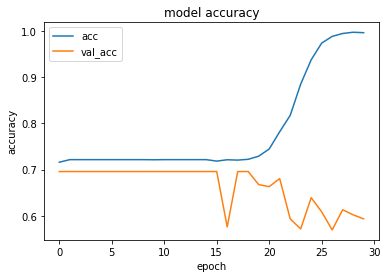

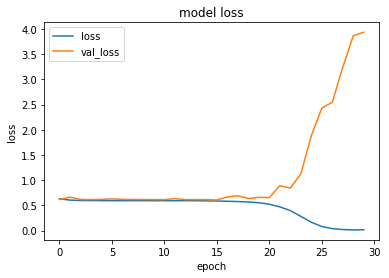

K-Fold has ran  10  time(s)

Model Accuracy after all K-Fold:  0.6865217391304348


In [58]:
# k-fold cross validation, k = n_folds

n_folds = 10
count = 0
cv_scores, model_history = list(), list()
for _ in range(n_folds):
    # split data
    X_train, X_val, y_train, y_val = train_test_split(newNPX, npY, test_size=0.10, random_state = np.random.randint(1,1000, 1)[0])
    # evaluate model
    model, test_acc = evaluate_model(X_train, X_val, y_train, y_val)
    count += 1
    cv_scores.append(test_acc)
    model_history.append(model)
    print('K-Fold has ran ', count, ' time(s)')
    
print('\nModel Accuracy after all K-Fold: ', (np.mean(cv_scores)))

In [59]:
result = model.predict(newNPX_v)
for each in result:
    print(each)

[0.46678197]
[0.48415792]
[0.44776845]
[0.48093483]
[0.452546]
[0.4820769]
[0.46862808]
[0.45553672]
[0.47019064]
[0.4675358]
[0.4567332]
[0.47033855]
[0.4604191]
[0.45818943]
[0.46712118]
[0.46240032]
[0.45329684]
[0.46361044]
[0.4384998]
[0.48152852]
[0.45343763]
[0.44112527]
[0.4722491]
[0.4366169]
[0.45609507]
[0.43673316]
[0.4691507]
[0.45388606]
[0.47093078]
[0.46653092]
[0.45061433]
[0.45476243]
[0.4493358]
[0.43172783]
[0.48647887]
[0.45056126]
[0.4811073]
[0.46851754]
[0.4618037]
[0.4955779]
[0.4865071]
[0.44296134]
[0.44168806]
[0.4655121]
[0.48939207]
[0.47216785]
[0.4613716]
[0.46745306]
[0.4558268]
[0.47062373]
[0.4834805]
[0.4786939]
[0.5090605]
[0.46892455]
[0.42401868]
[0.4594096]
[0.48247406]
[0.4549842]
[0.45216897]
[0.43682498]
[0.45539835]
[0.4560076]
[0.44528764]
[0.6182032]
[0.4062929]
[0.47386715]
[0.45467836]
[0.45438963]
[0.46288502]
[0.45961982]
[0.45842674]
[0.44441983]
[0.46324456]
[0.45562848]
[0.4607538]
[0.47090918]
[0.44565713]
[0.4513783]
[0.43890548]
[

[0.46925804]
[0.46913344]
[0.48883274]
[0.45845273]
[0.45956153]
[0.44900063]
[0.47749704]
[0.45900357]
[0.47242597]
[0.44046298]
[0.4911905]
[0.46140578]
[0.41602847]
[0.4914949]
[0.43228173]
[0.44982505]
[0.47793832]
[0.47439542]
[0.50287575]
[0.4574673]
[0.47510508]
[0.47348282]
[0.47874755]
[0.46349245]
[0.48905972]
[0.47434688]
[0.4460803]
[0.42607635]
[0.4926038]
[0.49154603]
[0.46232355]
[0.4642874]
[0.48991883]
[0.46116495]
[0.46127173]
[0.47130173]
[0.43717492]
[0.4436032]
[0.4763247]
[0.459405]
[0.44838667]
[0.473103]
[0.49379578]
[0.48510903]
[0.46511853]
[0.45520756]
[0.44764507]
[0.46891618]
[0.5175297]
[0.4733484]
[0.47292098]
[0.46373594]
[0.48666218]
[0.45134503]
[0.49436632]
[0.46454817]
[0.45009103]
[0.44598514]
[0.46565402]
[0.46747285]
[0.46727046]
[0.45022896]
[0.45448682]
[0.46313706]
[0.47953156]
[0.43337503]
[0.45754933]
[0.44296387]
[0.44149864]
[0.47678068]
[0.45016465]
[0.47734225]
[0.4610829]
[0.4624873]
[0.4739965]
[0.46421975]
[0.4881378]
[0.4621544]
[0.44

[0.4663872]
[0.49080464]
[0.46810874]
[0.45808595]
[0.4854261]
[0.46586776]
[0.47667885]
[0.45049676]
[0.46352383]
[0.45705307]
[0.47112662]
[0.45402768]
[0.45342782]
[0.4634436]
[0.45395398]
[0.45093948]
[0.44998813]
[0.45004785]
[0.4728002]
[0.44639164]
[0.4341374]
[0.44689056]
[0.48528004]
[0.4843472]
[0.44094062]
[0.5027874]
[0.4830285]
[0.4512898]
[0.479541]
[0.47209722]
[0.47980753]
[0.4426032]
[0.47824773]
[0.4675855]
[0.4610975]
[0.49253333]
[0.45544094]
[0.4447607]
[0.45636204]
[0.4699761]
[0.47057164]
[0.4855299]
[0.47764447]
[0.45686367]
[0.48745537]
[0.46287376]
[0.46014678]
[0.45281187]
[0.46560037]
[0.4800597]
[0.43647835]
[0.46457613]
[0.44527695]
[0.4320179]
[0.46268508]
[0.45376176]
[0.4714505]
[0.4567117]
[0.4602586]
[0.45475549]
[0.4733121]
[0.46099702]
[0.43261564]
[0.4655867]
[0.4348581]
[0.4525746]
[0.4496971]
[0.47152662]
[0.45253804]
[0.4935164]
[0.44702017]
[0.48190165]
[0.49663645]
[0.48999366]
[0.44779608]
[0.46953768]
[0.48378268]
[0.45936972]
[0.44855687]
[

In [60]:
np.mean(cv_scores)

0.6865217391304348